In [1]:
# Imports

import numpy as np
import matplotlib.pylab as plt



---



On se propose d'étudier l'énergie rayonnante d'un corps noir dans un intervalle d'émission $[\lambda, \lambda + d\lambda]$. On l'appelle aussi émittance monochromatique maximale du corps noir (en $Wb/m^2$) et elle est donnée par la loi de Planck : \\
$M(\lambda) = \dfrac{2 \pi h C_0^2}{n^2\lambda^5}. \dfrac{1}{\exp\big(\frac{h C_0}{n k T \lambda}\big) - 1}$ \\

où : 

*   $C_0$ est la vitesse de la lumière dans le vide. ($m.s^{-1}$).
* $h$ : constante de Planck ($J.s$).
* $k$ : constante de Boltzmann ($J.K^{-1}$).
* $\lambda$ : longueur d'onde ($m$).
* $T$ : température absolue de la surface du corps noir ($K$).
* $n$ : indice de réfraction du milieu (ici le vide).

Implémentons ces constantes ainsi que la fonction $M$. Nous prenons comme ensemble de départ $[ 10^{-7}, 2.10^{-5}]$. 

In [2]:
# Constantes.

c_0 = 2.997 * 10**8
h = 6.625 * 10**(-34)
k = 1.380 * 10**(-23)
n = 1

T = [300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]

lamb = np.linspace(10**(-7), 2 * 10**(-5), 500) # 500 points de discrétisations.

In [3]:
def M(lamb, T):
  return (2 * np.pi * h * c_0 * c_0 ) / ( (n * n * (lamb)**5) *
                                      (np.exp(h * c_0 / (n * k * T* lamb)) - 1)) 



---



Traçons notre fonction $M$ pour différentes valeurs de $T$ (implémentée au-dessus).

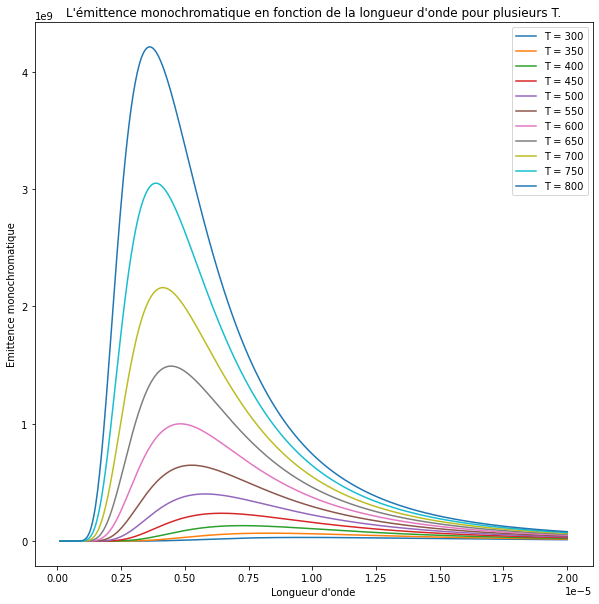

In [4]:
fig, ax = plt.subplots(figsize = (10,10))
for t in T:
  plt.plot(lamb, M(lamb, t), label = "T = " + str(t))

ax.set_xlabel("Longueur d'onde")
ax.set_ylabel("Emittence monochromatique")
ax.set_title("L'émittence monochromatique en fonction de la "
              "longueur d'onde pour plusieurs T.")

plt.legend();

Nous remarquons clairement l'existence d'un maximun pour chaque valeur de $T$.



---



On souhaite trouver la valeur $\lambda^*$ qui maximise l'émittance monochromatique pour une température de surface $T$ donnée. Etudions tout d'abord l'existence. Prenons $\lambda$ petit différent de $0$. Nous nous plaçons sur un compact $[\lambda, \lambda + d\lambda]$, de plus $M$ est continue sur cet ensemble par produit et composé de fonctions continues. Ainsi, le problème admet une solution de maximisation $\lambda^*$. 

On veut déterminer $\lambda^*$ à l'aide de la méthode de la section dorée. Le soucis est qu'on utilise cette méthode pour trouver le minimun d'une fonction. Cependant, maximiser $M$ revient à minimiser $-M$ ($\sup(M) = - \inf(-M$)). De plus pour appliquer la méthode de la section dorée, il faut que $-M$ soit unimodale (décroissante puis croissante). Dans notre cas, elle l'est puisque $M$ est croissante puis décroissante (graphiquement). Implémentons cette méthode pour certaines valeurs de $T$.

In [5]:
# Le nombre d'or.
nbr_or = (1 + np.sqrt(5))/2

# Itération maximale.
it_max = 100
# Liste des maximiseurs pour plusieurs valeurs de T.
max = []

# Nous parcourons toutes les valeurs de T.
for t in T:

# La méthode de la section dorée : 

  # On initialise a et b avec notre compact de base.
  a = 10**(-7)
  b = 2 * 10**(-5)

  # Itération.
  it = 0
  while ((it < it_max) and (np.linalg.norm( a - b ) > 1e-12)):

    it = it + 1
    a2 = a + 1/(nbr_or**2) * (b - a)
    b2 = a + 1/(nbr_or) * (b - a)

    if (-M(a2, t) < -M(b2, t)): # On peut aussi tout simplement écrire M(a2,) > M(b2, ).
      b = b2
    elif (-M(a2, t) > -M(b2, t)): # et ici M(a2,) < M(b2, ).
      a = a2
    else:
      a = a2
      b = b2
    
  max.append((a2 + b2)/2.)

In [6]:
print("Nos maximiseurs : \n",  max)

Nos maximiseurs : 
 [9.659242234849018e-06, 8.279350034943796e-06, 7.244431814299766e-06, 6.439494440367499e-06, 5.795545267256481e-06, 5.2686775373247586e-06, 4.829621025358346e-06, 4.458111489807037e-06, 4.13967462737021e-06, 3.863696783460212e-06, 3.622215332852115e-06]


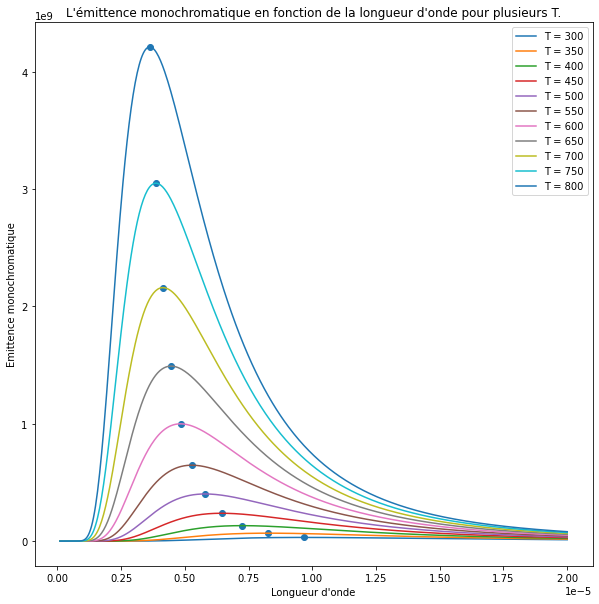

In [7]:
M_max = []

# On calcule nos maximuns en évaluant M par les maximiseurs.
for i in range(len(T)):
  M_max.append(M(max[i], T[i])) 

# On affiche notre graphique précédant avec nos maximuns.

fig, ax = plt.subplots(figsize = (10,10))
for t in T:
  plt.plot(lamb, M(lamb, t), label = "T = " + str(t))

ax.scatter(max, M_max)

ax.set_xlabel("Longueur d'onde")
ax.set_ylabel("Emittence monochromatique")
ax.set_title("L'émittence monochromatique en fonction de la "
              "longueur d'onde pour plusieurs T.")

plt.legend();



---




Nous allons afficher nos maximiseurs en fonction de $T$ ainsi que nos maximuns $M(\lambda^*)$ associé en fonction de $T$.

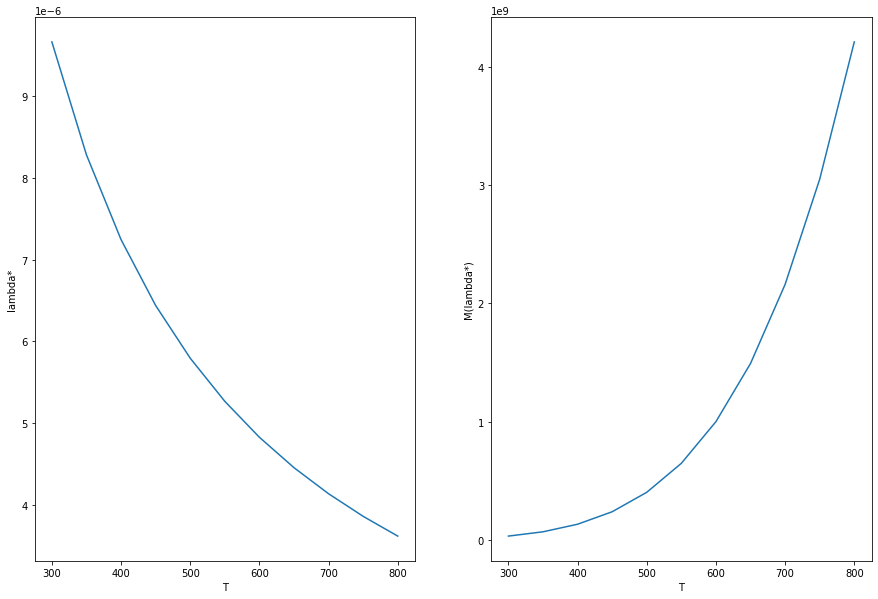

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (15, 10))

ax[0].plot(T, max);
ax[0].set_xlabel("T");
ax[0].set_ylabel("lambda*");

ax[1].plot(T, M_max);
ax[1].set_xlabel("T");
ax[1].set_ylabel("M(lambda*)");

Nous remarquons que la première courbe ressemble à une combinaison linéaire de $T \mapsto \frac{1}{T}$ et la deuxième courbe ressemble à un polynôme de la forme $X^n$ (on va supposer que c'est une combinaison linéaire d'un polynôme de degré $5$). Calculons les constantes associées.

In [9]:
max_new = max.copy()
for i in range(len(max_new)):
  max_new[i] *= T[i] # On calcule lambda(i) * T(i).

# Regardons si elle est constante (approximativement).
print("Constante A = ", max_new)

M_max_new = M_max.copy()
for i in range(len(M_max_new)):
  M_max_new[i] /= T[i]**5 # On calcule M(lambda)(i)/T^5(i).

# Regardons si elle est constante (approximativement).
print("Constante B = ", M_max_new)

Constante A =  [0.0028977726704547055, 0.0028977725122303287, 0.0028977727257199063, 0.0028977724981653747, 0.002897772633628241, 0.0028977726455286174, 0.0028977726152150073, 0.002897772468374574, 0.002897772239159147, 0.0028977725875951594, 0.002897772266281692]
Constante B =  [1.2856916145178018e-05, 1.2856916145178072e-05, 1.2856916145177953e-05, 1.285691614517806e-05, 1.2856916145178041e-05, 1.2856916145178045e-05, 1.285691614517805e-05, 1.2856916145178043e-05, 1.2856916145177706e-05, 1.2856916145178062e-05, 1.2856916145177764e-05]


Nous obtenons une liste de constantes $A$ et $B$, on voit bien qu'elles sont approximativement identiques au sein de leur liste respective. Nous allons afficher les courbes $T \mapsto \frac{A}{T}$ et $ T \mapsto BT^5$.

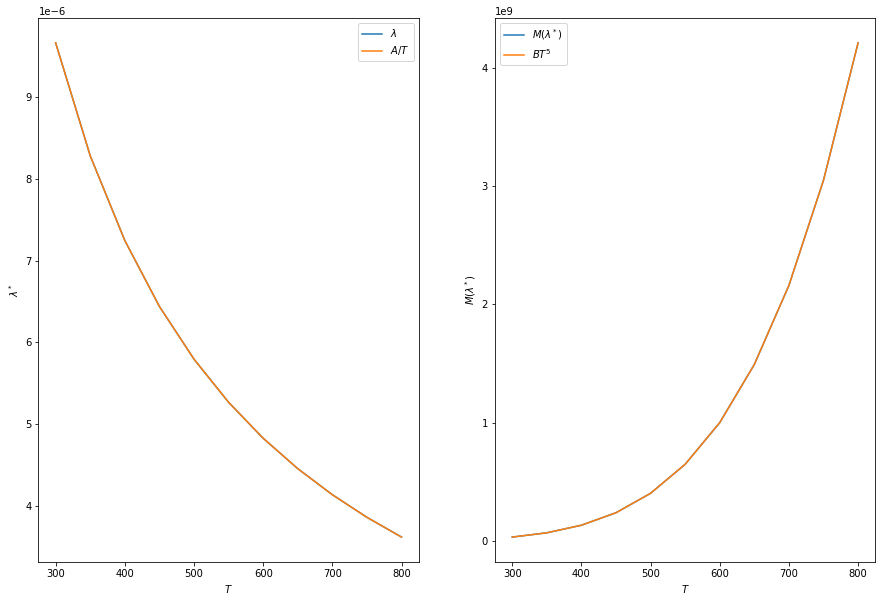

In [10]:
# On pose nos constantes : 
A = np.mean(max_new) # On prend la moyenne de la liste.
B = np.mean(M_max_new)

fig, ax = plt.subplots(1, 2, figsize = (15, 10))

ax[0].plot(T, max, label = "$\lambda$");
ax[0].plot(T, A * 1/T, label = "$A/T$");

ax[0].set_xlabel("$T$");
ax[0].set_ylabel("$\lambda^*$");

ax[1].plot(T, M_max, label = "$M(\lambda^*)$");
ax[1].plot(T, B * np.array(T)**5, label = "$BT^5$");

ax[1].set_xlabel("$T$");
ax[1].set_ylabel("$M(\lambda^*)$");

ax[0].legend();
ax[1].legend();

On remarque que les lois de Wien sont vérifies : \\
* $\lambda^* T = A$
* $M(\lambda^*) = B.T^5$. 